<center> <h2> MLJAR - AutoML </h2> </center>

---


<center> <h2> Garbage classification using MLJAR - An AutoML Tool </h2> </center>
<br>
<br>

---

### Importing all the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from supervised import AutoML 

from sklearn.datasets import make_classification 
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

from keras.preprocessing.image import ImageDataGenerator

### Data Augmentation:

In [ ]:
train_generator = ImageDataGenerator(
    rescale=1/255.,              
    brightness_range=[0.1, 0.7], 
    width_shift_range=0.5,       
    rotation_range=90,           
    horizontal_flip=True,        
    vertical_flip=True,          
)

In [ ]:
BATCH_SIZE = 495

traingen = train_generator.flow_from_directory(r'C:\Users\tsamr\Downloads\AIDI\sem 2\AIDI 1010 Emerging AI Technology\assignment\assignment 3\test images\Train',
                                               target_size=(100, 100),
                                               batch_size=BATCH_SIZE,
                                               class_mode='categorical',
                                               subset='training',
                                               shuffle=True,
                                               seed=42)

Found 495 images belonging to 3 classes.


> The batch size is set to 495 which is equal to the training images, we are going to use. In total, we have 495 images of 3 classes. Recyclable, Non-Recyclable and Organic are the three classes. We have 165 images of each.

### Splitting the Data:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    traingen[0][0],
    traingen[0][1], 
    test_size=0.1,
    random_state=123
    )

#3.3.2 - Print shapes of splits
print("X Train", X_train.shape)
print("y Train", y_train.shape)
print("X Test", X_test.shape)
print("y Test", y_test.shape)

X Train (445, 100, 100, 3)
y Train (445, 3)
X Test (50, 100, 100, 3)
y Test (50, 3)


### Reshaping the data to 1d or MLJAR acceptable format:

In [ ]:
X_train_reshape = np.reshape(X_train, (X_train.shape[0],-1))
X_test_reshape = np.reshape(X_test, (X_test.shape[0],-1))
y_train_reshape = np.reshape(y_train, (y_train.shape[0],-1))
y_test_reshape = np.reshape(y_test, (y_test.shape[0],-1))

In [ ]:
print("X Train", X_train_reshape.shape)
print("y Train", y_train_reshape.shape)
print("X Test", X_test_reshape.shape)
print("y Test", y_test_reshape.shape)

X Train (445, 30000)
y Train (445, 3)
X Test (50, 30000)
y Test (50, 3)


In [ ]:
# 1d array of 30000 pixel values

for i in range(1,10):
    print(f"Shape of the data ---> {X_train_reshape[i].shape}", end = ' ---->   ')
    print(f'Data: {X_train_reshape[i]}')

Shape of the data ---> (30000,) ---->   Data: [0.15686275 0.15686275 0.15686275 ... 0.16078432 0.16078432 0.16078432]
Shape of the data ---> (30000,) ---->   Data: [0.07058824 0.07843138 0.0509804  ... 0.07058824 0.01176471 0.00392157]
Shape of the data ---> (30000,) ---->   Data: [0.54509807 0.54509807 0.54509807 ... 0.54509807 0.54509807 0.54509807]
Shape of the data ---> (30000,) ---->   Data: [0.02745098 0.04705883 0.02352941 ... 0.0627451  0.07843138 0.10196079]
Shape of the data ---> (30000,) ---->   Data: [0.14509805 0.12941177 0.11764707 ... 0.05490196 0.05490196 0.0627451 ]
Shape of the data ---> (30000,) ---->   Data: [0.3529412  0.3254902  0.30980393 ... 0.40784317 0.37647063 0.3647059 ]
Shape of the data ---> (30000,) ---->   Data: [0.19215688 0.11764707 0.08627451 ... 0.2392157  0.22352943 0.22352943]
Shape of the data ---> (30000,) ---->   Data: [0.20784315 0.20784315 0.20784315 ... 0.20784315 0.20784315 0.20784315]
Shape of the data ---> (30000,) ---->   Data: [0.1019607

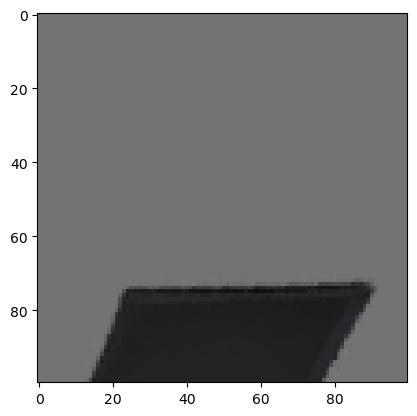

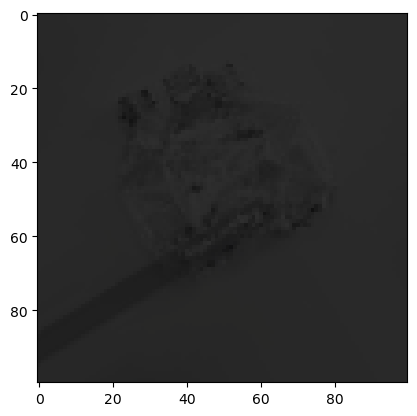

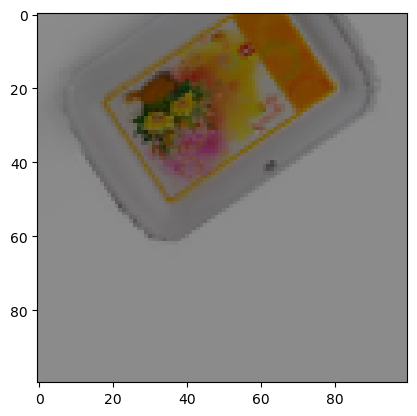

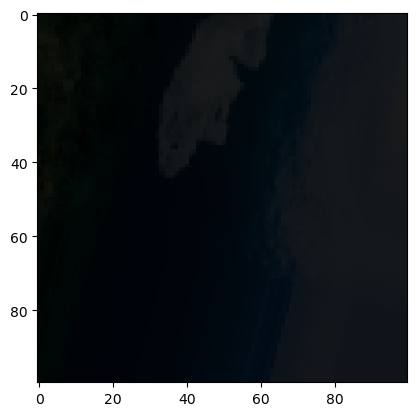

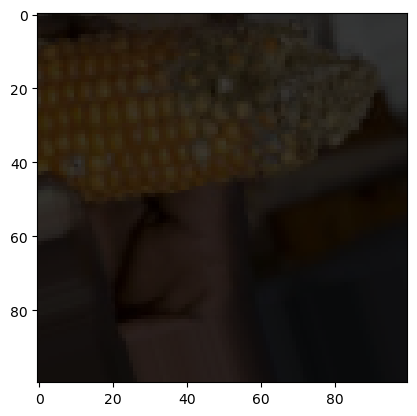

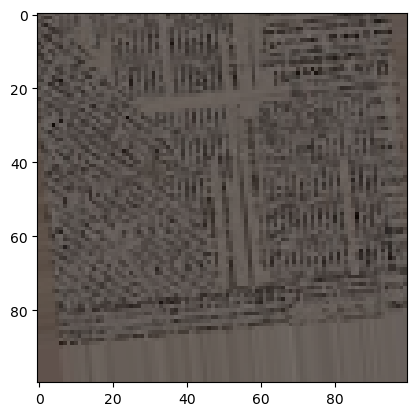

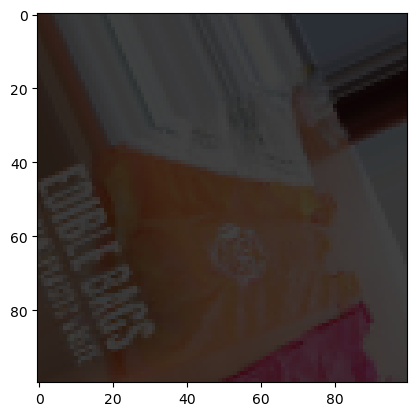

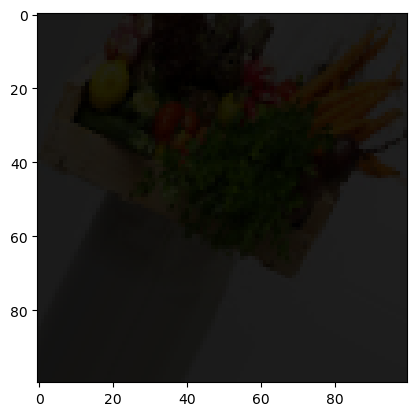

In [ ]:
# preview images

for i in range(0,10):
    plt.imshow(X_train[i])
    plt.show()

In [ ]:
for i in range(0,10):
    print(y_train_reshape[i])

[0. 0. 1.]
[1. 0. 0.]
[0. 1. 0.]
[0. 0. 1.]
[1. 0. 0.]
[0. 1. 0.]
[0. 0. 1.]
[1. 0. 0.]
[0. 0. 1.]
[0. 1. 0.]


### Note:

[1, 0, 0] ---> Non-Recyclable --> 1

[0, 1, 0] ---> Organic --> 2

[0, 0, 1] ---> Recyclable --> 3

In [ ]:
y_train_list = []

for i in range(len(y_train_reshape)):
    if y_train_reshape[i][0] == 1:
        y_train_list.append(1)
    elif y_train_reshape[i][1] == 1:
        y_train_list.append(2)
    else:
        y_train_list.append(3)
        
print(y_train_list)

[3, 1, 2, 3, 1, 2, 3, 1, 3, 2, 1, 2, 1, 3, 2, 2, 1, 3, 2, 3, 2, 2, 1, 3, 3, 1, 1, 3, 1, 1, 1, 3, 3, 1, 3, 3, 1, 3, 2, 1, 3, 2, 1, 1, 1, 2, 1, 1, 1, 1, 3, 3, 3, 2, 1, 1, 2, 3, 1, 3, 1, 3, 2, 1, 1, 2, 3, 2, 3, 1, 3, 3, 3, 2, 1, 2, 2, 2, 1, 1, 2, 2, 3, 3, 3, 2, 1, 3, 3, 2, 1, 1, 1, 1, 1, 3, 2, 3, 3, 3, 2, 3, 2, 3, 1, 3, 3, 1, 2, 2, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 2, 2, 2, 3, 1, 2, 1, 3, 3, 1, 1, 2, 2, 2, 2, 3, 3, 2, 2, 3, 2, 3, 3, 1, 2, 1, 3, 2, 2, 2, 2, 3, 1, 1, 2, 3, 1, 2, 1, 1, 1, 1, 1, 3, 3, 1, 3, 1, 2, 1, 2, 1, 3, 1, 1, 3, 3, 2, 2, 1, 2, 2, 2, 3, 3, 2, 3, 2, 1, 3, 1, 1, 1, 2, 3, 3, 1, 1, 1, 2, 3, 1, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 2, 2, 3, 2, 2, 2, 1, 3, 1, 3, 2, 2, 1, 3, 2, 2, 3, 2, 2, 3, 3, 3, 3, 1, 1, 1, 2, 2, 2, 2, 2, 3, 1, 1, 1, 3, 3, 3, 2, 2, 1, 2, 2, 3, 1, 3, 1, 3, 3, 3, 3, 1, 2, 3, 2, 3, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 3, 1, 2, 3, 2, 2, 3, 1, 2, 2, 1, 2, 2, 2, 2, 1, 3, 1, 3, 3, 1, 1, 3, 1, 3, 2, 2, 1, 1, 3, 3, 3, 3, 3, 2, 1, 1, 3, 2, 3, 2, 2, 2, 1, 1, 3, 3, 1, 2, 3, 1, 

In [ ]:
y_test_list = []

for i in range(len(y_test_reshape)):
    if y_test_reshape[i][0] == 1:
        y_test_list.append(1)
    elif y_test_reshape[i][1] == 1:
        y_test_list.append(2)
    else:
        y_test_list.append(3)
        
print(y_test_list)

[2, 1, 1, 3, 2, 2, 1, 1, 2, 2, 2, 3, 2, 2, 1, 2, 3, 2, 3, 1, 3, 1, 3, 3, 1, 1, 3, 2, 2, 2, 1, 3, 2, 1, 1, 2, 3, 3, 2, 2, 2, 2, 1, 1, 2, 3, 1, 2, 1, 2]


In [ ]:
# changes the list to series for better performance and system requirement
y_train_list = pd.Series(y_train_list)
y_test_list = pd.Series(y_test_list)

### Training of the Model:

In [ ]:
#Define Model
automl = AutoML(mode="Compete",algorithms=["Baseline", "Decision Tree", "Neural Network","Random Forest"],model_time_limit=900,
               ml_task="multiclass_classification",eval_metric="accuracy")

# Fit & Train Data into Model
automl.fit(X_train_reshape, y_train_list)

#Markdown Report of the model
automl.report()

Disable stacking for split validation
AutoML directory: AutoML_3
The task is multiclass_classification with evaluation metric accuracy
AutoML will use algorithms: ['Baseline', 'Decision Tree', 'Neural Network', 'Random Forest']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'not_so_random', 'golden_features', 'insert_random_feature', 'features_selection', 'hill_climbing_1', 'hill_climbing_2', 'ensemble']
* Step simple_algorithms will try to check up to 4 models
1_Baseline accuracy 0.355556 trained in 6.85 seconds
2_DecisionTree accuracy 0.422222 trained in 9.48 seconds
3_DecisionTree accuracy 0.466667 trained in 10.12 seconds
4_DecisionTree accuracy 0.377778 trained in 9.97 seconds
* Step default_algorithms will try to check up to 2 models
5_Default_NeuralNetwork accuracy 0.533333 trained in 13.12 seconds
6_Default_RandomForest accuracy 0.688889 trained in 109.97 seconds
* Step not_so_random will try to check up to 18 models
7_RandomFore

AutoML fit time: 6202.76 seconds
AutoML best model: 8_RandomForest


Our model took a total of 6202.76 second to train all the model. The best model we got was Random Forest model with the training accuracy score of 0.73. 

From the box plot, we can see that, the neural network was the least accurate performing model which is surprising as Neural Network work best with image data. However, the random forest model was able to out perform the NN consistently and give us the best model.

## Prediction:

In [ ]:
predictions = automl.predict_all(X_test_reshape)
predictions

prediction_1  prediction_2  prediction_3  label
0       0.129498      0.686718      0.183784      2
1       0.139890      0.678029      0.182081      2
2       0.321880      0.163623      0.514497      3
3       0.405323      0.077674      0.517003      3
4       0.283151      0.577792      0.139057      2
5       0.143923      0.722351      0.133727      2
6       0.508951      0.118916      0.372133      1
7       0.658781      0.168221      0.172998      1
8       0.076056      0.866901      0.057043      2
9       0.327032      0.497048      0.175920      2
10      0.217408      0.103279      0.679313      3
11      0.185697      0.077590      0.736713      3
12      0.167659      0.559484      0.272857      2
13      0.286528      0.468059      0.245413      2
14      0.369202      0.294929      0.335869      1
15      0.282399      0.499038      0.218563      2
16      0.245929      0.234771      0.519299      3
17      0.300265      0.506957      0.192777      2
18      0.213038      0.120189      0.666773      3
19      0.489619      0.100767      0.409614      1
20      0.296012      0.175644      0.528344      3
21      0.699737      0.193020      0.107243      1
22      0.550817      0.055415      0.393768      1
23      0.224009      0.465815      0.310176      2
24      0.513704      0.305936      0.180359      1
25      0.184656      0.173653      0.641690      3
26      0.232891      0.069592      0.697517      3
27      0.352991      0.355320      0.291689      2
28      0.207710      0.508662      0.283628      2
29      0.472257      0.356643      0.171099      1
30      0.295066      0.138876      0.566058      3
31      0.133599      0.348066      0.518335      3
32      0.565041      0.363406      0.071553      1
33      0.647739      0.175984      0.176277      1
34      0.428442      0.268414      0.303144      1
35      0.300671      0.134339      0.564990      3
36      0.320591      0.473909      0.205501      2
37      0.390626      0.337505      0.271869      1
38      0.413413      0.424916      0.161671      2
39      0.372579      0.099403      0.528018      3
40      0.436293      0.487471      0.076236      2
41      0.348145      0.395484      0.256371      2
42      0.646312      0.181622      0.172067      1
43      0.056280      0.434510      0.509210      3
44      0.537577      0.340390      0.122033      1
45      0.576303      0.220680      0.203017      1
46      0.323094      0.427098      0.249809      2
47      0.378735      0.335315      0.285950      1
48      0.207666      0.066121      0.726213      3
49      0.454250      0.331698      0.214051      1

## Testing of the Model:

In [ ]:
print("Test accuracy:", accuracy_score(y_test_list,predictions["label"].astype(int)))

Test accuracy: 0.6


# Machine Learning Predictions and Outcomes

Yes, the predictions of the trained model did match with our expectations. Considering the time taken, size of the dataset, and the resolution of images in the dataset, we feel that the accuracy is as we expected. The same accuracy would not have been achievable without the use of autoML as it has created ensemble models and done feature engineering to get the final accuracy. 


# **Conclusion**

The project that we performed aimed to design a smart bin that can help segregate the waste according to their recycling nature in order to eliminate the biodegradable waste mixing with the plastic waste. The prototype made for the project includes the model made using MLjar. That uses the concept of image recognition in order to separate the waste into different bins. We successfully achieved the accuracy of 60% with our model and will tend to improve it by feeding more data to our model and fine tuning its hyperparameters.